<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#use-numpy-arrays-for-data" data-toc-modified-id="use-numpy-arrays-for-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>use numpy arrays for data</a></span></li><li><span><a href="#use-flow-from-directory-for-data" data-toc-modified-id="use-flow-from-directory-for-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>use flow from directory for data</a></span></li></ul></div>

In [1]:
#matplotlib.use("Agg") # use in case of CL python run
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers 
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2
import os
import random
from shutil import copyfile
import matplotlib


### use numpy arrays for data

In [3]:
dataset='/home/emmanouela/Documents/mosAIc.gr/data'

In [4]:
imagePaths = list(paths.list_images(dataset))

data = []
labels = []
full = []
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (213, 283))
    data.append(image)
    labels.append(label)
    full.append(imagePath)

In [5]:
data = np.array(data)
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

(trainX, validX, trainY, validY) = train_test_split(data, labels,test_size=0.25, shuffle=True, random_state=42)

[0 1 0]
/home/emmanouela/Documents/mosAIc.gr/data/images/narrowing/narrowing_clip49_03.jpg


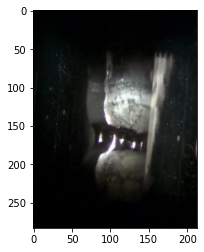

In [10]:
rand=1800
image=data[rand,:,:,:]
plt.imshow(image)
print(labels[rand])
print(full[rand])

In [45]:
# add potential augmentation
train_datagen = ImageDataGenerator(rescale=1/255,rotation_range=5,
                zoom_range=0.1,
                width_shift_range=0.1,
                height_shift_range=0.1,
                horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1/255)

In [13]:
import tensorflow.keras
tensorflow.keras.backend.clear_session()

In [4]:
PARAMS = {'lr': 1e-4,
          'dropout': 0.5,
          'batch_size': 64,
          'n_epochs': 15,
          'optimizer': 'RMSprop',
          'loss': 'categorical_crossentropy',
          'metrics': 'acc',
          'activations': 'relu, softmax',
          'image_input_shape' : (213,283,3)
          }

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(213,283,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(PARAMS['dropout']))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(PARAMS['dropout']))
model.add(layers.Dense(3, activation='softmax'))

In [6]:
model.compile(loss=PARAMS['loss'],
              optimizer=optimizers.RMSprop(lr=PARAMS['lr']),
              metrics=[PARAMS['metrics']])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 211, 281, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 105, 140, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 103, 138, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 51, 69, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 67, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 33, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 31, 256)       2

In [31]:

spe=len(trainX) // PARAMS['batch_size']
val_spe=len(validY) // PARAMS['batch_size']

history = model.fit(x=train_datagen.flow(trainX, trainY, batch_size=PARAMS['batch_size'],shuffle=True),
steps_per_epoch=spe,
validation_data=valid_datagen.flow(validX, validY),
validation_steps=val_spe,
epochs=PARAMS['n_epochs'])

Epoch 1/15
26/26 [==============================] - 33s 1s/step - loss: 0.9830 - acc: 0.5638 - val_loss: 0.3980 - val_acc: 1.0000
Epoch 2/15
26/26 [==============================] - 34s 1s/step - loss: 0.4816 - acc: 0.8503 - val_loss: 0.1865 - val_acc: 1.0000
Epoch 3/15
26/26 [==============================] - 34s 1s/step - loss: 0.2380 - acc: 0.9445 - val_loss: 0.0337 - val_acc: 1.0000
Epoch 4/15
26/26 [==============================] - 35s 1s/step - loss: 0.1453 - acc: 0.9636 - val_loss: 0.0164 - val_acc: 1.0000
Epoch 5/15
26/26 [==============================] - 34s 1s/step - loss: 0.1151 - acc: 0.9686 - val_loss: 0.0084 - val_acc: 1.0000
Epoch 6/15
26/26 [==============================] - 34s 1s/step - loss: 0.0924 - acc: 0.9692 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 7/15
26/26 [==============================] - 34s 1s/step - loss: 0.0877 - acc: 0.9754 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 8/15
 6/26 [=====>........................] - ETA: 22s - loss: 0.0156 - acc: 1.0000

KeyboardInterrupt: 

               precision    recall  f1-score   support

first_Contact       1.00      0.74      0.85       204
    narrowing       0.95      1.00      0.97       189
       stable       0.79      1.00      0.89       170

     accuracy                           0.90       563
    macro avg       0.91      0.91      0.90       563
 weighted avg       0.92      0.90      0.90       563



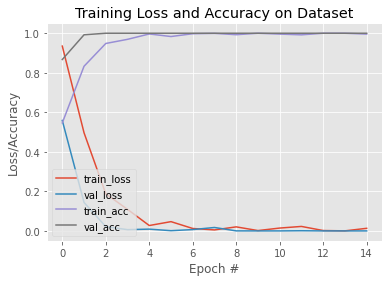

In [21]:
# perform predictions on validation set

predictions = model.predict(x=validX.astype("float32"), batch_size=PARAMS['batch_size'])
print(classification_report(validY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

# plot the training loss and accuracy
#N = args["epochs"]
N=15
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])


In [ ]:
#model.save(args["model"], save_format="h5")
model.save('results/sports.h5', save_format="h5")

#f = open(args["label_bin"], "wb")
f = open('results/lb.pickle', "wb")

f.write(pickle.dumps(lb))
f.close()

### use flow from directory for data

In [38]:
# create the hierarchy of directories to copy the data into

class_data_path='/home/emmanouela/Documents/mosAIc.gr/data/images/classification'
if not os.path.exists(class_data_path):
    os.mkdir(class_data_path)

data_types=['train','validation','test']
classes=['first_Contact','narrowing','stable']


for dtype in data_types:
    path1=os.path.join(class_data_path,dtype)
    if not os.path.exists(path1):
        os.mkdir(path1)
    for c in classes:
        path2=os.path.join(path1,c)
        if not os.path.exists(path2):
            os.mkdir(path2)
     




In [40]:
# function for splitting the data into train, validation, and test data (after shuffling them) and populating the directoyr structure created above

def pop_dirs(SOURCE, TRAINING, VALIDATION, TEST, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    validation_length = int((len(files) - training_length)/2.0)
    test_length = validation_length
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    validation_set = shuffled_set[training_length:training_length+validation_length]
    test_set = shuffled_set[training_length+validation_length:training_length+validation_length+test_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
        #os.remove(this_file)

    for filename in validation_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)
        #os.remove(this_file)

    for filename in test_set:
        this_file = SOURCE + filename
        destination = TEST + filename
        copyfile(this_file, destination)
        #os.remove(this_file)




In [41]:
# the actual copying of files from the 'data' folder into the local labeled folder structure 
classes=['first_Contact','narrowing','stable']
import random
from shutil import copyfile
j=0
split_size = .70
for i in classes:
  
  dest_directory=classes[j]
  src_dir='/home/emmanouela/Documents/mosAIc.gr/data/images'
  src_path=os.path.join(src_dir,i)+'/'
  
  training_dir = '/home/emmanouela/Documents/mosAIc.gr/data/images/classification/train'
  train_path=os.path.join(training_dir,dest_directory)+'/'
  
  validation_dir = '/home/emmanouela/Documents/mosAIc.gr/data/images/classification/validation'
  validation_path=os.path.join(validation_dir,dest_directory)+'/'

  test_dir = '/home/emmanouela/Documents/mosAIc.gr/data/images/classification/test'
  test_path=os.path.join(test_dir,dest_directory)+'/'

  pop_dirs(src_path, train_path, validation_path, test_path, split_size)

  
  print(src_path)
  j+=1


/home/emmanouela/Documents/mosAIc.gr/data/images/first_Contact/
/home/emmanouela/Documents/mosAIc.gr/data/images/narrowing/
/home/emmanouela/Documents/mosAIc.gr/data/images/stable/


In [2]:
# check number of images per directory

data_types=['train','validation','test']
classes=['first_Contact','narrowing','stable']



for dtype in data_types:
    for c in classes:
        path=os.path.join('/home/emmanouela/Documents/mosAIc.gr/data/images/classification',dtype,c)
        print('number of',  dtype,  'images in', str(c),':', len(os.listdir(path)))

number of train images in first_Contact : 525
number of train images in narrowing : 525
number of train images in stable : 525
number of validation images in first_Contact : 112
number of validation images in narrowing : 112
number of validation images in stable : 112
number of test images in first_Contact : 112
number of test images in narrowing : 112
number of test images in stable : 112


In [3]:
PARAMS = {'lr': 1e-4,
          'dropout': 0.5,
          'batch_size': 64,
          'n_epochs': 5,
          'optimizer': 'RMSprop',
          'loss': 'categorical_crossentropy',
          'metrics': 'acc',
          'activations': 'relu, softmax',
          'image_input_shape' : (213,283,3)
          }

In [4]:
train_datagen = ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True)
validation_datagen = ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True)
test_datagen = ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True)

train = train_datagen.flow_from_directory(
        '/home/emmanouela/Documents/mosAIc.gr/data/images/classification/train',
        target_size=(213, 283),
        batch_size=PARAMS['batch_size'],
        class_mode='categorical',shuffle=True) 

validation = validation_datagen.flow_from_directory(
        '/home/emmanouela/Documents/mosAIc.gr/data/images/classification/validation',
        target_size=(213, 283),
        batch_size=PARAMS['batch_size'],
        class_mode='categorical',shuffle=True)


test = test_datagen.flow_from_directory(
        '/home/emmanouela/Documents/mosAIc.gr/data/images/classification/test',
        target_size=(213, 283),
        batch_size=PARAMS['batch_size'],
        class_mode='categorical',shuffle=True)

Found 1575 images belonging to 3 classes.
Found 336 images belonging to 3 classes.
Found 336 images belonging to 3 classes.


In [12]:
trainX,trainY=train.next()
validX,validY=validation.next()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(213,283,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(PARAMS['dropout']))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(PARAMS['dropout']))
model.add(layers.Dense(3, activation='softmax'))

In [6]:
model.compile(loss=PARAMS['loss'],
              optimizer=optimizers.RMSprop(lr=PARAMS['lr']),
              metrics=[PARAMS['metrics']])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 211, 281, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 105, 140, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 103, 138, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 51, 69, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 67, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 33, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 31, 256)       2

In [8]:

spe=len(train) 
val_spe=len(validation) 

history = model.fit(train,
steps_per_epoch=spe,
validation_data=validation,
validation_steps=val_spe,
epochs=PARAMS['n_epochs'])

Epoch 1/5
25/25 [==============================] - 34s 1s/step - loss: 0.4339 - acc: 0.8863 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 2/5
25/25 [==============================] - 35s 1s/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.0732e-04 - val_acc: 1.0000
Epoch 3/5
25/25 [==============================] - 35s 1s/step - loss: 5.2990e-04 - acc: 1.0000 - val_loss: 3.2156e-05 - val_acc: 1.0000
Epoch 4/5
25/25 [==============================] - 35s 1s/step - loss: 7.9019e-05 - acc: 1.0000 - val_loss: 5.9004e-06 - val_acc: 1.0000
Epoch 5/5
25/25 [==============================] - 35s 1s/step - loss: 1.6741e-05 - acc: 1.0000 - val_loss: 9.8135e-07 - val_acc: 1.0000


In [24]:

per = np.random.permutation(validation.n)
validation.index_array = per
classes =validation.classes[per]

In [41]:
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [56]:
# perform predictions on validation set
validation.reset()
realY = np.empty((0,3),int)
for i in range(6):
    validX,validY = validation.next()
    realY = np.append(realY,validY,axis = 0)    

print(realY.shape)

predictions = model.predict(x=validation,verbose=1)#, batch_size=PARAMS['batch_size'])

print(classification_report(realY.argmax(axis=1),predictions.argmax(axis=1)))



(336, 3)
6/6 [==============================] - 1s 194ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       112
           2       1.00      1.00      1.00       112

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00       336



In [ ]:

# plot the training loss and accuracy
#N = args["epochs"]

N=15
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])
